In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

from datetime import datetime
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from tensorflow.keras.models import Model
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, Normalizer
import os 
import warnings
import gc
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, classification_report
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from keras.layers import  MaxPool1D, Conv1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
#To show evaluation metrices: classification report, F/P, F/N
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [3]:
columns=(['Destination_Port',
'Flow_Duration',
'Total_Fwd_Packets',
'Total_Backward_Packets',
'Total_Length_of_Fwd_Packets',
'Total_Length_of_Bwd_Packets',
'Fwd_Packet_Length_Max',
'Fwd_Packet_Length_Min',
'Fwd_Packet_Length_Mean',
'Fwd_Packet_Length_Std',
'Bwd_Packet_Length_Max',
'Bwd_Packet_Length_Min',
'Bwd_Packet_Length_Mean',
'Bwd_Packet_Length_Std',
'Flow_Bytes',
'Flow_Packets',
'Flow_IAT_Mean',
'Flow_IAT_Std',
'Flow_IAT_Max',
'Flow_IAT_Min',
'Fwd_IAT_Total',
'Fwd_IAT_Mean',
'Fwd_IAT_Std',
'Fwd_IAT_Max',
'Fwd_IAT_Min',
'Bwd_IAT_Total',
'Bwd_IAT_Mean',
'Bwd_IAT_Std',
'Bwd_IAT_Max',
'Bwd_IAT_Min',
'Fwd_PSH_Flags',
'Bwd_PSH_Flags',
'Fwd_URG_Flags',
'Bwd_URG_Flags',
'Fwd_Header_Length',
'Bwd_Header_Length',
'Fwd_Packets',
'Bwd_Packets',
'Min_Packet_Length',
'Max_Packet_Length',
'Packet_Length_Mean',
'Packet_Length_Std',
'Packet_Length_Variance',
'FIN-Flag_Count',
'SYN_Flag_Count',
'RST_Flag_Count',
'PSH_Flag_Count',
'ACK_Flag_Count',
'URG_Flag_Count',
'CWE_Flag_Count',
'ECE_Flag_Count',
'Down/Up_Ratio',
'Average_Packet_Size',
'Avg_Fwd_Segment_Size',
'Avg_Bwd_Segment_Size',
'Fwd_Hea_er_Length_1',
'Fwd_Avg-Bytes/Bulk',
'Fwd_Avg_Packets/Bulk',
'Fwd_Avg_Bulk Rate',
'Bwd_Avg_Bytes/Bulk',
'Bwd_Avg_Packets/Bulk',
'Bwd_Avg_Bulk_Rate',
'Subflow_Fwd_Packets',
'Subflow_Fwd_Bytes',
'Subflow_Bwd_Packets',
'Subflow_Bwd_Bytes',
'Init_Win_bytes_forward',
'Init_Win_bytes_backward',
'act_data_pkt_fwd',
'min_seg_size_forward',
'Active_Mean',
'Active_Std',
'Active_Max',
'Active_Min',
'Idle_Mean',
'Idle_Std',
'Idle_Max',
'Idle_Min',
'Label'])

In [4]:
df_DDoS = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_DDoS.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df_DDoS.columns=columns

In [6]:
df_DDoS.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df_DDoS.shape

(225745, 79)

In [8]:
df_DDoS.iloc[:,0:40].isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Backward_Packets         0
Total_Length_of_Fwd_Packets    0
Total_Length_of_Bwd_Packets    0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Mean         0
Fwd_Packet_Length_Std          0
Bwd_Packet_Length_Max          0
Bwd_Packet_Length_Min          0
Bwd_Packet_Length_Mean         0
Bwd_Packet_Length_Std          0
Flow_Bytes                     4
Flow_Packets                   0
Flow_IAT_Mean                  0
Flow_IAT_Std                   0
Flow_IAT_Max                   0
Flow_IAT_Min                   0
Fwd_IAT_Total                  0
Fwd_IAT_Mean                   0
Fwd_IAT_Std                    0
Fwd_IAT_Max                    0
Fwd_IAT_Min                    0
Bwd_IAT_Total                  0
Bwd_IAT_Mean                   0
Bwd_IAT_Std                    0
Bwd_IAT_Max                    0
Bwd_IAT_Min                    0
Fwd_PSH_Fl

In [9]:
df_DDoS.iloc[:,39:80].isna().sum()

Max_Packet_Length          0
Packet_Length_Mean         0
Packet_Length_Std          0
Packet_Length_Variance     0
FIN-Flag_Count             0
SYN_Flag_Count             0
RST_Flag_Count             0
PSH_Flag_Count             0
ACK_Flag_Count             0
URG_Flag_Count             0
CWE_Flag_Count             0
ECE_Flag_Count             0
Down/Up_Ratio              0
Average_Packet_Size        0
Avg_Fwd_Segment_Size       0
Avg_Bwd_Segment_Size       0
Fwd_Hea_er_Length_1        0
Fwd_Avg-Bytes/Bulk         0
Fwd_Avg_Packets/Bulk       0
Fwd_Avg_Bulk Rate          0
Bwd_Avg_Bytes/Bulk         0
Bwd_Avg_Packets/Bulk       0
Bwd_Avg_Bulk_Rate          0
Subflow_Fwd_Packets        0
Subflow_Fwd_Bytes          0
Subflow_Bwd_Packets        0
Subflow_Bwd_Bytes          0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
Active_Mean                0
Active_Std                 0
Active_Max                 0
Active_Min    

In [10]:
df_DDoS = df_DDoS.dropna(axis = 0, how ='any') 

In [11]:
df_DDoS.isnull().sum().any()

False

In [12]:
df_DDoS.shape

(225741, 79)

In [13]:
df_DDoS['Label'].value_counts()

DDoS      128027
BENIGN     97714
Name: Label, dtype: int64

In [14]:
# changing the target columns to binary
df_DDoS['Label']=df_DDoS.Label.map(lambda a: 0 if a == 'BENIGN' else 1)
df_DDoS['Label'].value_counts()

1    128027
0     97714
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

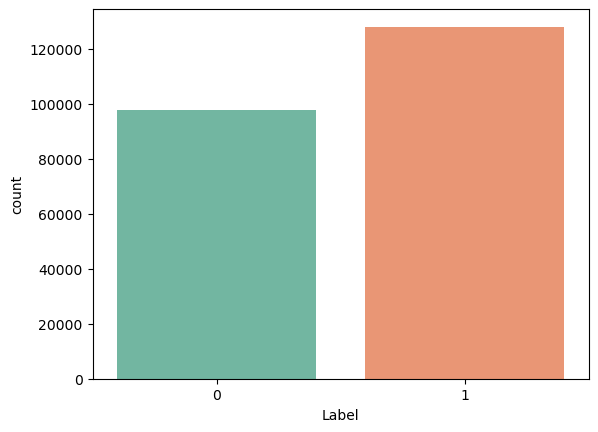

In [15]:
sns.countplot(x='Label', data=df_DDoS, palette='Set2')

In [16]:
# Selecting top 20 relevant columns: UFS, RFE and RFE(CV)

UFS_selected_columns1= ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean','Label']

df_UFS1 = df_DDoS[UFS_selected_columns1]

In [17]:
# Selecting top 10 relevant columns: : UFS, RFE and RFE(CV)
UFS_selected_columns2=['Destination_Port', 'Total_Fwd_Packets','Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets',
 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Mean','Fwd_Packet_Length_Std','Bwd_Packet_Length_Max',
 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean','Label'] 
df_UFS2 = df_DDoS[UFS_selected_columns2]

In [18]:
df_UFS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination_Port             225741 non-null  int64  
 1   Flow_Duration                225741 non-null  int64  
 2   Total_Fwd_Packets            225741 non-null  int64  
 3   Total_Backward_Packets       225741 non-null  int64  
 4   Total_Length_of_Fwd_Packets  225741 non-null  int64  
 5   Total_Length_of_Bwd_Packets  225741 non-null  int64  
 6   Fwd_Packet_Length_Max        225741 non-null  int64  
 7   Fwd_Packet_Length_Min        225741 non-null  int64  
 8   Fwd_Packet_Length_Mean       225741 non-null  float64
 9   Fwd_Packet_Length_Std        225741 non-null  float64
 10  Bwd_Packet_Length_Max        225741 non-null  int64  
 11  Bwd_Packet_Length_Min        225741 non-null  int64  
 12  Bwd_Packet_Length_Mean       225741 non-null  float64
 13 

# Models Predictions using top relevant 20 Features

In [20]:
# label col
Y_UFS1 = df_UFS1.Label

# independant variable
X_UFS1 = df_UFS1.drop(columns = ["Label"] )

# Create a classic train-test split 
X_train, X_test, Y_train, Y_test = train_test_split(X_UFS1, Y_UFS1, test_size=0.20, random_state=101)

print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)

# Over-sampling
balance =  SMOTE(random_state=42)

#fitting
x_over_balanced, y_over_balanced = balance.fit_resample(X_train,Y_train)
# Scaling
scaler = MinMaxScaler()
sX_train = scaler.fit_transform(x_over_balanced)
sX_test = scaler.transform(X_test)
print(y_over_balanced.value_counts())

Train Shape:  (180592, 20)
Test Shape:  (45149, 20)
1    102389
0    102389
Name: Label, dtype: int64


In [22]:
lr=LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()

In [23]:
for a,b in zip([lr,dt,rm,gnb],["Logistic Regression","Decision Tree","Random Forest","Naive Bayes"]):
    a.fit(sX_train,y_over_balanced)
    prediction=a.predict(sX_train)
    y_pred=a.predict(sX_test)
    score1=accuracy_score(y_over_balanced,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.980457
[Logistic Regression] test data accuracy is : 0.982303
[Decision Tree] training data accuracy is : 0.999956
[Decision Tree] test data accuracy is : 0.999646
[Random Forest] training data accuracy is : 0.999956
[Random Forest] test data accuracy is : 0.999823
[Naive Bayes] training data accuracy is : 0.960465
[Naive Bayes] test data accuracy is : 0.966400


Overall Accuracy: 99.96%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19511
           1       1.00      1.00      1.00     25638

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



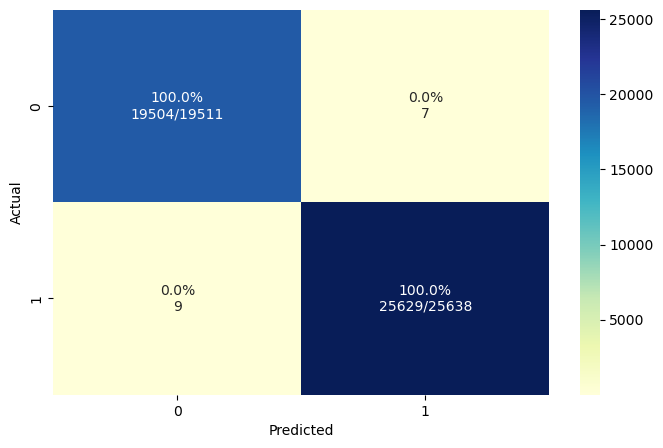

In [24]:
y_pred = dt.predict(sX_test)

report_heatmap(y_pred,Y_test)

Overall Accuracy: 99.98%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19511
           1       1.00      1.00      1.00     25638

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



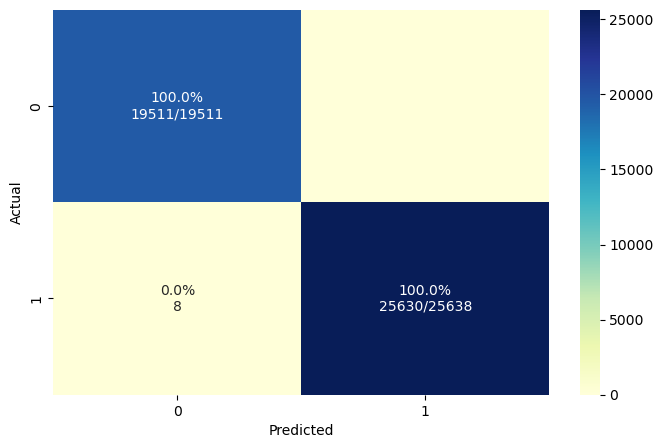

In [25]:
#Selected
y_pred = rm.predict(sX_test)

report_heatmap(y_pred,Y_test)

Deep Neural Networks

In [28]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(sX_train.shape[1],)))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(sX_train,y_over_balanced,batch_size=100,epochs=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Train on 204778 samples
Epoch 1/2
204778/204778 [==============================] - 5s 24us/sample - loss: 0.1513 - accuracy: 0.9471
Epoch 2/2
204778/204778 [==============================] - 4s 20us/sample - loss: 0.0642 - accuracy: 0.9833


Overall Accuracy: 98.47%
--------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     19511
           1       0.99      0.98      0.99     25638

    accuracy                           0.98     45149
   macro avg       0.98      0.99      0.98     45149
weighted avg       0.98      0.98      0.98     45149



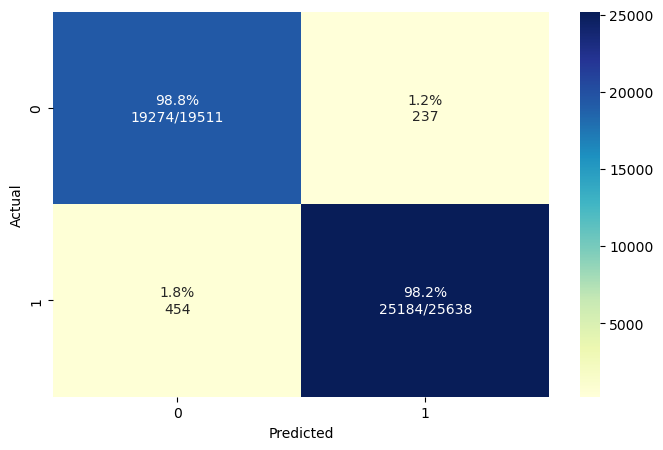

In [30]:
# Predictions  
y_pred=(model.predict(sX_test)> 0.5)

# display report
report_heatmap(y_pred,Y_test) 

# Models Predictions using top relevant 10 Features

In [31]:
# label col
Y_UFS2 = df_UFS2.Label

# independant variable
X_UFS2 = df_UFS2.drop(columns = ["Label"] )

# Create a classic train-test split 
X_train, X_test, Y_train, Y_test = train_test_split(X_UFS2, Y_UFS2, test_size=0.20, random_state=101)

print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)

# Over-sampling
balance =  SMOTE(random_state=42)

#fitting
x_over_balanced, y_over_balanced = balance.fit_resample(X_train,Y_train)
# Scaling
scaler = MinMaxScaler()
sX_train = scaler.fit_transform(x_over_balanced)
sX_test = scaler.transform(X_test)
print(y_over_balanced.value_counts())

Train Shape:  (180592, 10)
Test Shape:  (45149, 10)
1    102389
0    102389
Name: Label, dtype: int64


In [33]:
lr=LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()

In [34]:
for a,b in zip([lr,dt,rm,gnb],["Logistic Regression","Decision Tree","Random Forest","Naive Bayes"]):
    a.fit(sX_train,y_over_balanced)
    prediction=a.predict(sX_train)
    y_pred=a.predict(sX_test)
    score1=accuracy_score(y_over_balanced,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.959097
[Logistic Regression] test data accuracy is : 0.965979
[Decision Tree] training data accuracy is : 0.999477
[Decision Tree] test data accuracy is : 0.999336
[Random Forest] training data accuracy is : 0.999477
[Random Forest] test data accuracy is : 0.999336
[Naive Bayes] training data accuracy is : 0.959249
[Naive Bayes] test data accuracy is : 0.965979


Overall Accuracy: 99.93%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19511
           1       1.00      1.00      1.00     25638

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



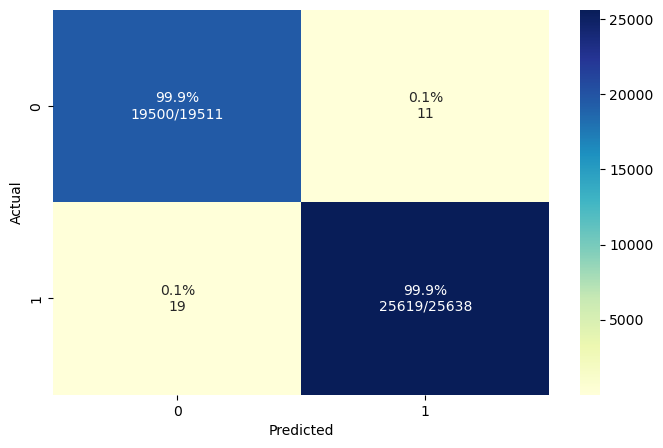

In [35]:

y_pred = dt.predict(sX_test)

report_heatmap(y_pred,Y_test)

Overall Accuracy: 99.93%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19511
           1       1.00      1.00      1.00     25638

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



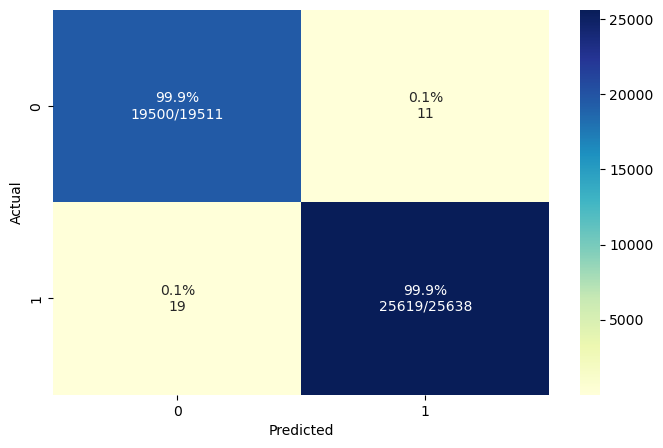

In [36]:
y_pred = rm.predict(sX_test)

report_heatmap(y_pred,Y_test)

Deep Neural Networks

In [40]:
#Selected
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(sX_train.shape[1],)))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(sX_train,y_over_balanced,batch_size=100,epochs=5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________
Train on 204778 samples
Epoch 1/5
204778/204778 [==============================] - 4s 20us/sample - loss: 0.2050 - accuracy: 0.9130
Epoch 2/5
204778/204778 [==============================] - 4s 18us/sample - loss: 0.1073 - accuracy: 0.9592
Epoch 3/5
204778/204778 [==============================] - 4s 19us/sample - loss

Overall Accuracy: 97.95%
--------------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     19511
           1       0.97      1.00      0.98     25638

    accuracy                           0.98     45149
   macro avg       0.98      0.98      0.98     45149
weighted avg       0.98      0.98      0.98     45149



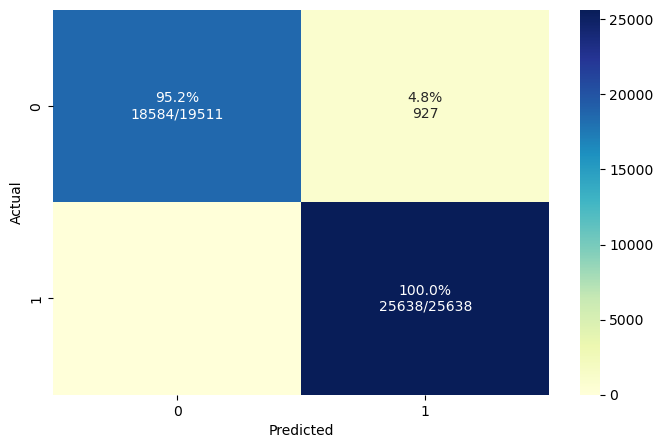

In [41]:
#Selected
# Predictions  
y_pred=(model.predict(sX_test)> 0.5)

# display report
report_heatmap(y_pred,Y_test) 

In [39]:
#End